<a href="https://colab.research.google.com/github/OliviaSifanWu/Machine-Learning-final-project/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import absolute
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('finaldata.csv')
data.columns



Index(['UserID', 'ItemID', 'buy', 'cart', 'fav', 'pv', 'user_total_buy',
       'user_total_cart', 'user_total_fav', 'user_total_pv',
       'user_pv_conversion', 'user_cart_conversion', 'user_fav_conversion',
       'item_total_buy', 'item_total_cart', 'item_total_fav', 'item_total_pv',
       'item_pv_conversion', 'item_cart_conversion', 'item_fav_conversion'],
      dtype='object')

In [ ]:
data['buy'].value_counts()

0    531922
1     13871
Name: buy, dtype: int64

In [ ]:
data['cart'].value_counts()

0    507832
1     37961
Name: cart, dtype: int64

In [ ]:
data['fav'].value_counts()

0    525016
1     20777
Name: fav, dtype: int64

In [ ]:
summary = data[['buy', 'cart', 'fav', 'pv', 'user_total_buy',
       'user_total_cart', 'user_total_fav', 'user_total_pv',
       'user_pv_conversion', 'user_cart_conversion', 'user_fav_conversion',
       'item_total_buy', 'item_total_cart', 'item_total_fav', 'item_total_pv',
       'item_pv_conversion', 'item_cart_conversion', 'item_fav_conversion']].describe()
summary

,buy,cart,fav,pv,user_total_buy,user_total_cart,user_total_fav,user_total_pv,user_pv_conversion,user_cart_conversion,user_fav_conversion,item_total_buy,item_total_cart,item_total_fav,item_total_pv,item_pv_conversion,item_cart_conversion,item_fav_conversion
count,545793.000000,545793.000000,545793.000000,545793.000000,545793.000000,545793.000000,545793.00000,545793.000000,545793.000000,545793.000000,545793.000000,545793.000000,545793.000000,545793.000000,545793.000000,545793.000000,545793.000000,545793.000000
mean,0.025414,0.069552,0.038068,1.174007,1.668739,7.776644,4.50012,142.829534,0.015681,0.328132,0.302246,0.031314,0.349834,0.192307,5.958539,0.002557,0.011067,0.009616
std,0.157380,0.254391,0.191360,0.896022,2.778975,9.368301,10.19579,100.715547,0.067998,0.926083,1.078161,0.292080,0.960491,0.605230,12.653476,0.033051,0.133865,0.127151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.00000,119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,2.000000,11.000000,5.00000,195.000000,0.018405,0.272727,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,65.000000,55.000000,77.000000,133.00000,745.000000,9.000000,18.333333,14.000000,10.000000,17.000000,13.000000,240.000000,2.000000,8.000000,6.000000


In [ ]:
summary.to_csv('summary.csv',index = True, header=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


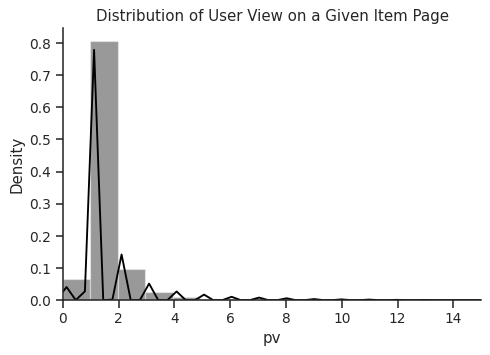

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(figsize=(6, 4),dpi=90)
sns.distplot(data['pv'], bins=66, color ='black', kde=True, ax=ax)
ax.set_xlim(0, 15)
plt.title('Distribution of User View on a Given Item Page')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


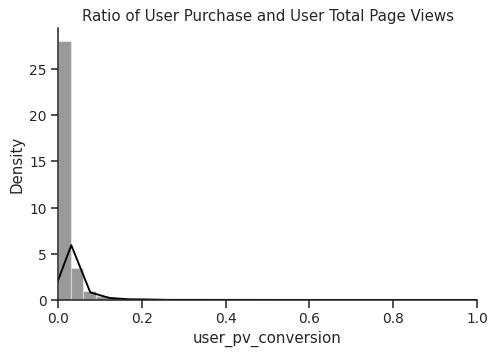

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(figsize=(6, 4),dpi=90)
sns.distplot(data['user_pv_conversion'], bins = 300, color ='black', kde=True, ax=ax)
ax.set_xlim(0, 1)
plt.title('Ratio of User Purchase and User Total Page Views')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


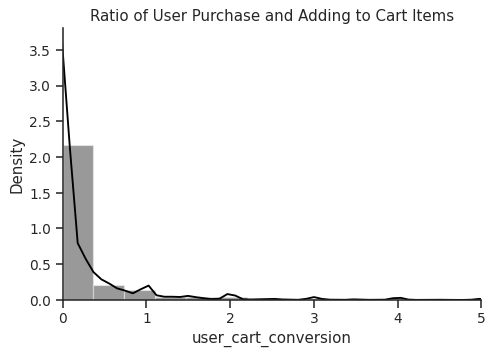

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(figsize=(6, 4),dpi=90)
sns.distplot(data['user_cart_conversion'], color ='black', kde=True, ax=ax)
ax.set_xlim(0, 5)
plt.title('Ratio of User Purchase and Adding to Cart Items')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


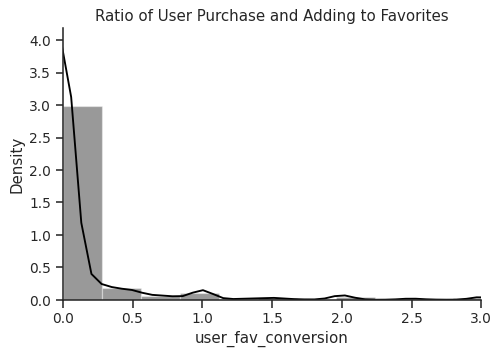

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(figsize=(6, 4),dpi=90)
sns.distplot(data['user_fav_conversion'], color ='black', kde=True, ax=ax)
ax.set_xlim(0, 3)
plt.title('Ratio of User Purchase and Adding to Favorites')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



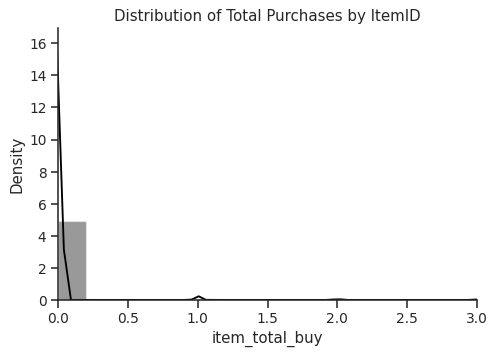

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(figsize=(6, 4),dpi=90)
sns.distplot(data['item_total_buy'], color ='black', kde=True, ax=ax)
ax.set_xlim(0, 3)
plt.title('Distribution of Total Purchases by ItemID')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



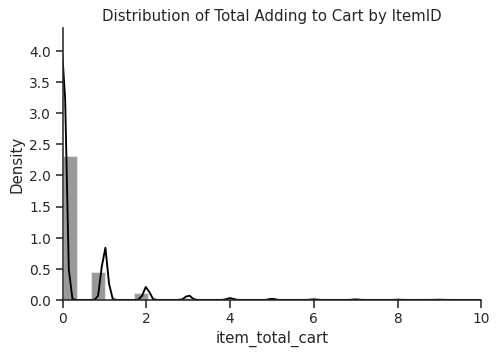

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(figsize=(6, 4),dpi=90)
sns.distplot(data['item_total_cart'], color ='black', kde=True, ax=ax)
ax.set_xlim(0, 10)
plt.title('Distribution of Total Adding to Cart by ItemID')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



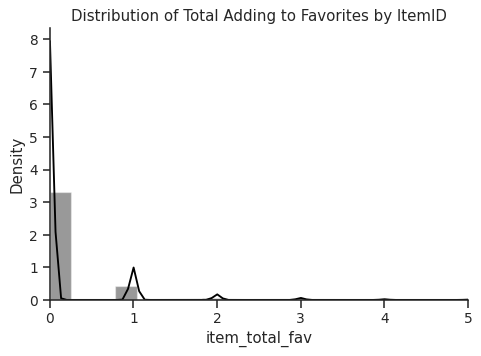

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(figsize=(6, 4),dpi=90)
sns.distplot(data['item_total_fav'], color ='black', kde=True, ax=ax)
ax.set_xlim(0, 5)
plt.title('Distribution of Total Adding to Favorites by ItemID')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



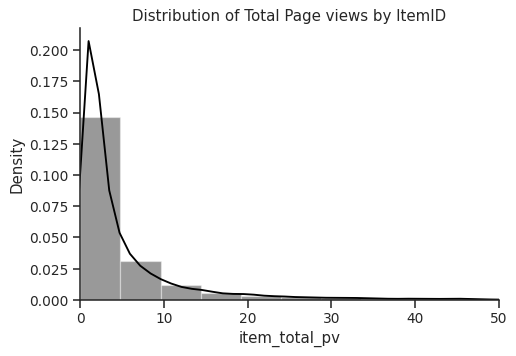

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(figsize=(6, 4),dpi=90)
sns.distplot(data['item_total_pv'], color ='black', kde=True, ax=ax)
ax.set_xlim(0, 50)
plt.title('Distribution of Total Page views by ItemID')
plt.show()

In [ ]:
data = data[['UserID', 'user_total_buy','user_total_cart', 'user_total_fav', 'user_total_pv',
       'user_pv_conversion', 'user_cart_conversion', 'user_fav_conversion']]


In [ ]:
data = data.drop_duplicates()
data

,UserID,user_total_buy,user_total_cart,user_total_fav,user_total_pv,user_pv_conversion,user_cart_conversion,user_fav_conversion
0,249,2,11,0,135,0.014815,0.181818,0.0
91,363,1,1,1,98,0.010204,1.000000,1.0
169,420,0,13,2,48,0.000000,0.000000,0.0
225,467,0,10,1,94,0.000000,0.000000,0.0
302,514,0,2,2,23,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
545639,1017279,0,3,0,27,0.000000,0.000000,0.0
545663,1017383,0,0,0,12,0.000000,0.000000,0.0
545674,1017583,0,6,0,14,0.000000,0.000000,0.0
545693,1017728,2,1,0,89,0.022472,2.000000,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


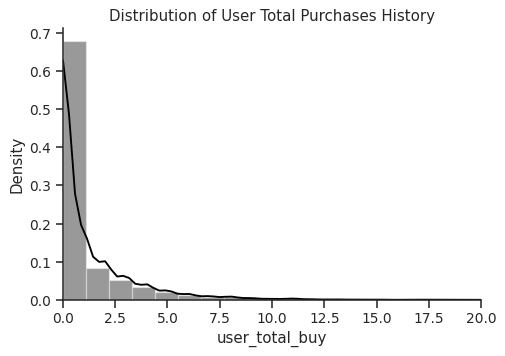

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, ax = plt.subplots(figsize=(6, 4),dpi=90)
sns.distplot(data['user_total_buy'], color ='black', kde=True, ax=ax)
ax.set_xlim(0, 20)
plt.title('Distribution of User Total Purchases History')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


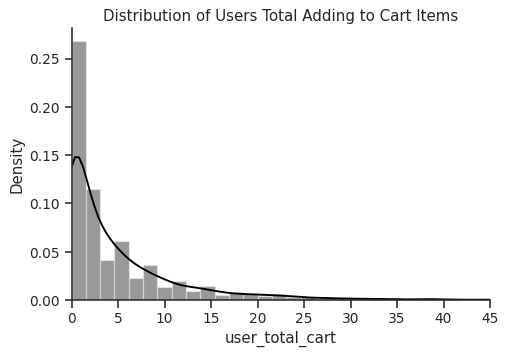

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4),dpi=90)
sns.distplot(data['user_total_cart'], color ='black', kde=True, ax=ax)
ax.set_xlim(0, 45)
plt.title('Distribution of Users Total Adding to Cart Items')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


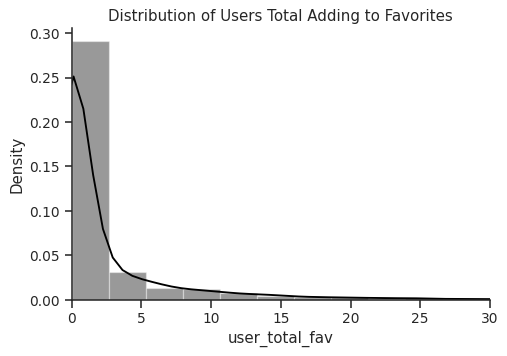

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4),dpi=90)
sns.distplot(data['user_total_fav'], color ='black', kde=True, ax=ax)
ax.set_xlim(0, 30)
plt.title('Distribution of Users Total Adding to Favorites')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


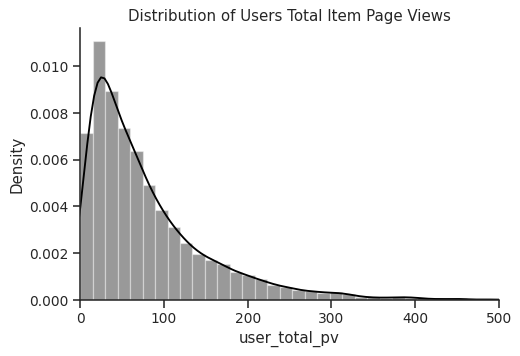

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4),dpi=90)
sns.distplot(data['user_total_pv'], color ='black', kde=True, ax=ax)
ax.set_xlim(0, 500)
plt.title('Distribution of Users Total Item Page Views')
plt.show()

In [ ]:
data=data.drop(columns = ['UserID'])

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-1.69830081, -1.65459669, -0.16148415, ..., -0.0773513 ,
        -0.0826702 , -0.07563007],
       [-1.69830081, -1.62921647, -0.16148415, ..., -0.0773513 ,
        -0.0826702 , -0.07563007],
       [-1.69830081, -1.5780376 , -0.16148415, ..., -0.0773513 ,
        -0.0826702 , -0.07563007],
       ...,
       [ 1.77678799,  1.45013641, -0.16148415, ..., -0.0773513 ,
        -0.0826702 , -0.07563007],
       [ 1.77678799,  1.51300536, -0.16148415, ..., -0.0773513 ,
        -0.0826702 , -0.07563007],
       [ 1.77678799,  1.68503145, -0.16148415, ..., -0.0773513 ,
        -0.0826702 , -0.07563007]])

In [ ]:
scaled_data = pd.DataFrame(scaled_data)


In [ ]:
scaled_data.columns = data.columns
scaled_data

,UserID,ItemID,buy,cart,fav,pv,user_total_buy,user_total_cart,user_total_fav,user_total_pv,user_pv_conversion,user_cart_conversion,user_fav_conversion,item_total_buy,item_total_cart,item_total_fav,item_total_pv,item_pv_conversion,item_cart_conversion,item_fav_conversion
0,-1.698301,-1.654597,-0.161484,-0.273406,-0.198932,-0.1942,0.119203,0.344071,-0.441371,-0.077739,-0.012738,-0.157992,-0.280335,-0.107211,-0.364225,-0.317743,-0.391872,-0.077351,-0.08267,-0.07563
1,-1.698301,-1.629216,-0.161484,-0.273406,-0.198932,-0.1942,0.119203,0.344071,-0.441371,-0.077739,-0.012738,-0.157992,-0.280335,-0.107211,-0.364225,-0.317743,-0.391872,-0.077351,-0.08267,-0.07563
2,-1.698301,-1.578038,-0.161484,-0.273406,-0.198932,-0.1942,0.119203,0.344071,-0.441371,-0.077739,-0.012738,-0.157992,-0.280335,-0.107211,-0.364225,-0.317743,0.003277,-0.077351,-0.08267,-0.07563
3,-1.698301,-1.407609,-0.161484,-0.273406,-0.198932,-0.1942,0.119203,0.344071,-0.441371,-0.077739,-0.012738,-0.157992,-0.280335,-0.107211,-0.364225,-0.317743,-0.312842,-0.077351,-0.08267,-0.07563
4,-1.698301,-1.387486,-0.161484,-0.273406,-0.198932,-0.1942,0.119203,0.344071,-0.441371,-0.077739,-0.012738,-0.157992,-0.280335,-0.107211,-0.364225,-0.317743,0.082306,-0.077351,-0.08267,-0.07563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545788,1.776788,1.136254,-0.161484,-0.273406,-0.198932,-0.1942,-0.600488,-0.723360,-0.343291,-1.249357,-0.230609,-0.354323,-0.280335,-0.107211,-0.364225,-0.317743,-0.312842,-0.077351,-0.08267,-0.07563
545789,1.776788,1.255597,-0.161484,-0.273406,-0.198932,-0.1942,-0.600488,-0.723360,-0.343291,-1.249357,-0.230609,-0.354323,-0.280335,-0.107211,-0.364225,-0.317743,-0.391872,-0.077351,-0.08267,-0.07563
545790,1.776788,1.450136,-0.161484,-0.273406,-0.198932,-0.1942,-0.600488,-0.723360,-0.343291,-1.249357,-0.230609,-0.354323,-0.280335,-0.107211,-0.364225,-0.317743,-0.391872,-0.077351,-0.08267,-0.07563
545791,1.776788,1.513005,-0.161484,-0.273406,-0.198932,-0.1942,-0.600488,-0.723360,-0.343291,-1.249357,-0.230609,-0.354323,-0.280335,-0.107211,-0.364225,1.334523,-0.391872,-0.077351,-0.08267,-0.07563


In [ ]:
behavior = scaled_data[['user_total_buy','user_total_cart', 'user_total_fav', 'user_total_pv']]
behavior

,user_total_buy,user_total_cart,user_total_fav,user_total_pv
0,0.119203,0.344071,-0.441371,-0.077739
1,0.119203,0.344071,-0.441371,-0.077739
2,0.119203,0.344071,-0.441371,-0.077739
3,0.119203,0.344071,-0.441371,-0.077739
4,0.119203,0.344071,-0.441371,-0.077739
...,...,...,...,...
545788,-0.600488,-0.723360,-0.343291,-1.249357
545789,-0.600488,-0.723360,-0.343291,-1.249357
545790,-0.600488,-0.723360,-0.343291,-1.249357
545791,-0.600488,-0.723360,-0.343291,-1.249357


In [ ]:
behavior.describe()

,user_total_buy,user_total_cart,user_total_fav,user_total_pv
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,2.640665e-16,-6.038225e-16,-2.217844e-16,3.461120e-17
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-5.132666e-01,-7.081561e-01,-3.861637e-01,-1.079782e+00
25%,-5.132666e-01,-7.081561e-01,-3.861637e-01,-7.157905e-01
50%,-5.132666e-01,-4.170333e-01,-3.861637e-01,-2.978746e-01
75%,3.586163e-01,3.107735e-01,-9.049355e-02,3.761833e-01
max,2.346351e+01,1.050007e+01,1.927590e+01,8.963681e+00


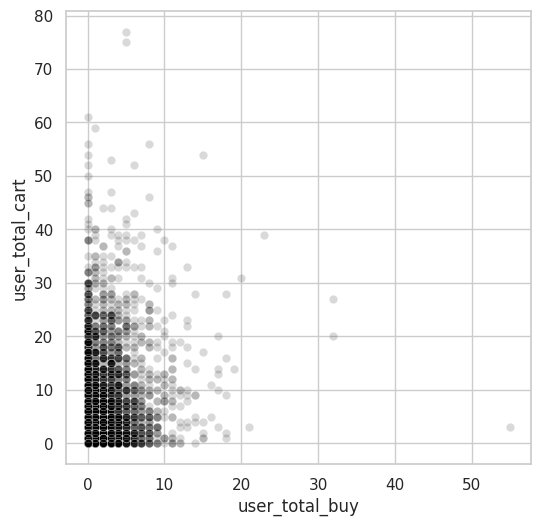

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6),dpi = 100)
sns.scatterplot(data=data, x="user_total_buy", y="user_total_cart", alpha= 0.15,color = 'black')


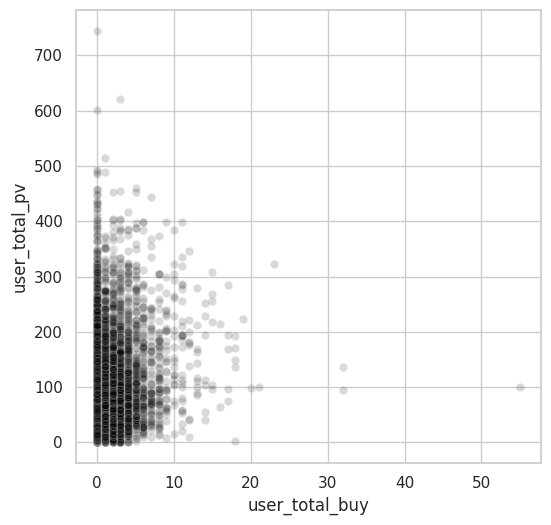

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6),dpi = 100)
sns.scatterplot(data=data, x="user_total_buy", y="user_total_pv",alpha= 0.15, color = 'black')


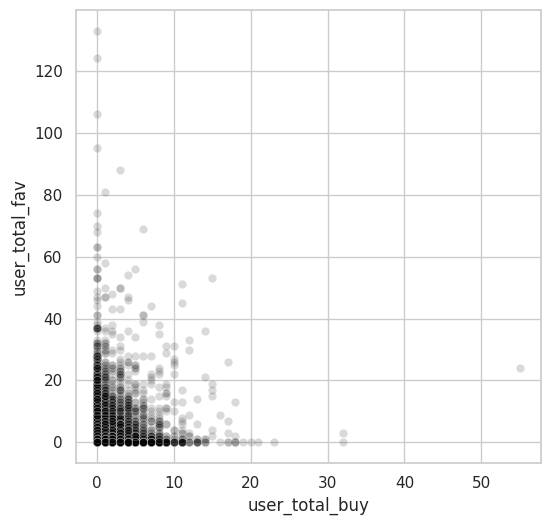

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6),dpi = 100)
sns.scatterplot(data=data, x="user_total_buy", y="user_total_fav",alpha= 0.15, color = 'black')

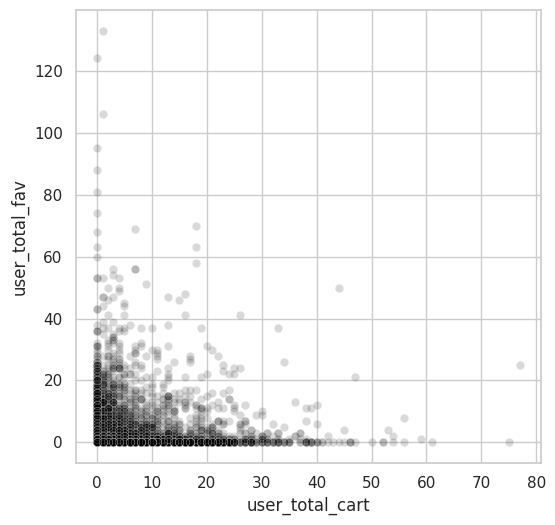

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6),dpi = 100)
sns.scatterplot(data=data, x="user_total_cart", y="user_total_fav",alpha= 0.15, color = 'black')

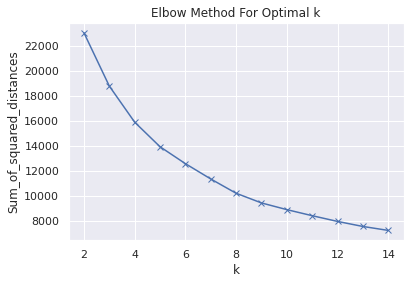

In [ ]:
sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans( n_clusters=k,
                    n_init=50,
                    max_iter=500)
    km = km.fit(behavior)
    sum_of_squared_distances.append(km.inertia_)


sns.set()
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
data

[Scatter3d({
     'marker': {'color': array([1, 0, 0, ..., 0, 0, 0], dtype=int32), 'size': 3},
     'mode': 'markers',
     'x': array([ 0.35861633, -0.07732511, -0.51326656, ..., -0.51326656,  0.35861633,
                 -0.51326656]),
     'y': array([-0.38616371, -0.23832863, -0.09049355, ..., -0.38616371, -0.38616371,
                 -0.23832863]),
     'z': array([ 0.74017455,  0.24137171, -0.43268619, ..., -0.89104556,  0.12004129,
                 -0.85060209])
 })]

In [ ]:
# input matrix for segmentation, including buy, fav and pv
a = behavior[['user_total_buy', 'user_total_fav', 'user_total_pv']].values
aa = data[['user_total_buy', 'user_total_fav', 'user_total_pv']].values
a

array([[ 0.11920275, -0.44137082, -0.07773915],
       [ 0.11920275, -0.44137082, -0.07773915],
       [ 0.11920275, -0.44137082, -0.07773915],
       ...,
       [-0.60048781, -0.34329103, -1.24935676],
       [-0.60048781, -0.34329103, -1.24935676],
       [-0.60048781, -0.34329103, -1.24935676]])

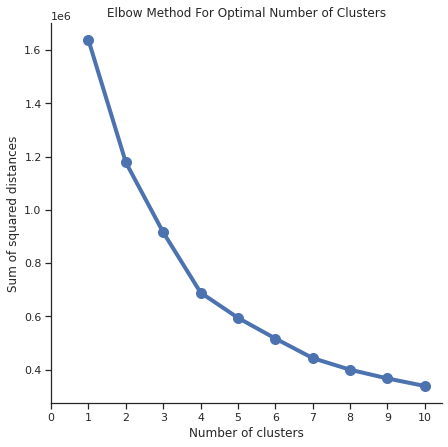

In [ ]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,n_init=50,
                    max_iter=500)
    model.fit(a)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=10,marker='o')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [ ]:
# k=4 
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, n_init = 50, random_state = 0)
y_clusters = model.fit_predict(a)

In [ ]:
#pip install plotly

In [ ]:
import plotly.graph_objs as go
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Number of Purchases'),yaxis = dict(title  = 'Number of Favorites'),zaxis = dict(title  = 'Number of Item Page Views'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=aa[:, 0], y=aa[:, 1], z=aa[:, 2], mode='markers',marker=dict(color = labels, size= 3,colorscale='Portland'),opacity=0.8)
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
dataa = [trace]
fig = go.Figure(data = dataa, layout = layout)
fig.show()

In [ ]:
#Silhouette coefficient
#A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm.

#Silhouette scores range from -1 to +1. The higher the silhouette score, the better the model.

from sklearn.metrics import silhouette_score
print(silhouette_score(a, model.labels_, metric='euclidean'))

0.5073324900671167
0.44523279525258763


In [ ]:
# input matrix for segmentation, including buy, cart and pv
b = behavior[['user_total_buy', 'user_total_cart', 'user_total_pv']].values
bb = data[['user_total_buy', 'user_total_cart', 'user_total_pv']].values

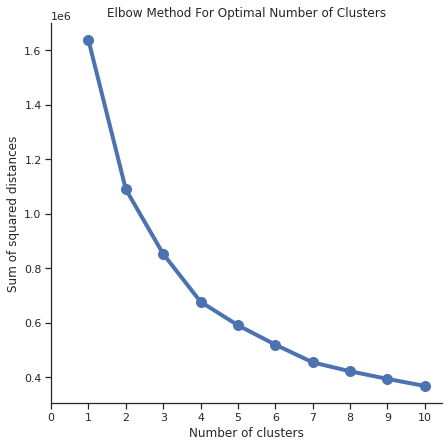

In [ ]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,n_init=50,
                    max_iter=500)
    model.fit(b)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=10,marker='o')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [ ]:
# k=4 
model2 = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, n_init = 50, random_state = 0)
y_clusters2 = model2.fit_predict(b)

In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Number of Purchases'),yaxis = dict(title  = 'Add to Cart Quantity'),zaxis = dict(title  = 'Number of Item Page Views'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model2.labels_
trace = go.Scatter3d(x=bb[:, 0], y=bb[:, 1], z=bb[:, 2], mode='markers',marker=dict(color = labels, size= 3,colorscale='Portland'),opacity=0.8)
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
dataa = [trace]
fig = go.Figure(data = dataa, layout = layout)
fig.show()

In [ ]:

print(silhouette_score(b, model2.labels_, metric='euclidean'))

0.446811780192092
0.41208185088813026


In [ ]:
# input matrix for segmentation, including buy, fav and cart
c = behavior[['user_total_buy', 'user_total_fav', 'user_total_cart']].values
cc = data[['user_total_buy', 'user_total_fav', 'user_total_cart']].values

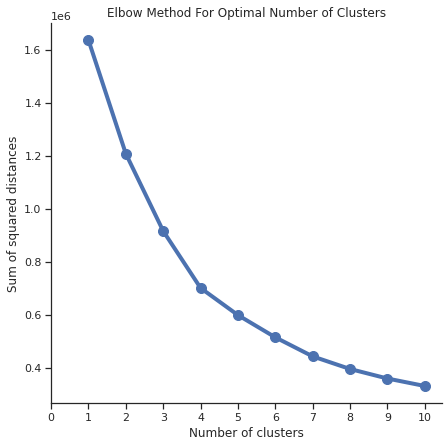

In [ ]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,n_init=50,
                    max_iter=500)
    model.fit(c)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=10,marker='o')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [ ]:
#k=4
model3 = KMeans(n_clusters = 4, init = "k-means++", max_iter = 500, n_init = 50, random_state = 0)
y_clusters3 = model3.fit_predict(c)

In [ ]:
print(silhouette_score(c, model3.labels_, metric='euclidean'))

0.5615533261919884


In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Number of Purchases'),yaxis = dict(title  = 'Number of Favorites'),zaxis = dict(title  = 'Add to Cart Quantity'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model3.labels_
trace = go.Scatter3d(x=cc[:, 0], y=cc[:, 1], z=cc[:, 2], mode='markers',marker=dict(color = labels, size= 3,colorscale='Portland'),opacity=0.8)
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
dataa = [trace]
fig = go.Figure(data = dataa, layout = layout)
fig.show()